# Ajuste de Regresión Líneal (29 Enero 2021)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import stats, polyval
import itertools
import os

plt.style.use('ggplot')

In [2]:
# load data
path = '/home/rho/gdrive/Personales/Robert/Santoto/20211/Maestria_DM_ML/01_Semana1/01B_clase/'
arbol = pd.read_csv(path + 'base_arboles.csv', sep = ';')
arbol.head()

,objectid,fisiologia,altura,diametro,pap,perimetro,altura_fus
0,58566,Perennifolio,8.971847,2.00,0.40,0.45,2.523279
1,144860,Semicaducifolio,7.510006,4.00,0.29,0.35,3.081373
2,146014,Semicaducifolio,15.186397,7.57,1.63,2.14,5.509542
3,151897,Semicaducifolio,11.940282,7.00,0.70,1.74,4.560590
4,15787,Caducifolio,1.600000,0.80,0.00,0.23,0.550000


In [3]:
arbol['fisiologia'].value_counts()

Caducifolio        397
Perennifolio       375
Semicaducifolio    226
Name: fisiologia, dtype: int64

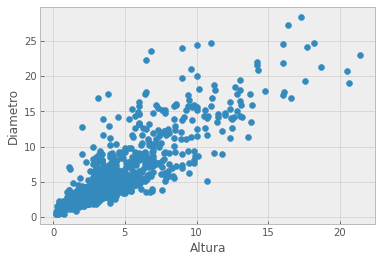

In [4]:
plt.style.use('bmh')
arbol.dropna(inplace=True)
y = arbol['altura'].values
x = arbol['diametro'].values
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Diametro')
plt.show()

# Normalizar los datos

\begin{equation}
x = \frac{x - \bar{x}}{\sigma_{x}}
\end{equation}

Text(0, 0.5, 'Volumen')

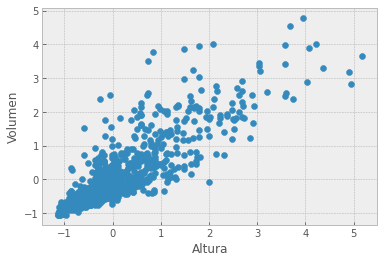

In [5]:
(y_mean, y_std) = (y.mean(), y.std())
(x_mean, x_std) = (x.mean(), x.std())

z_y = (y - y_mean)/ y_std
z_x = (x - x_mean)/ x_std

plt.scatter(z_x, z_y)
plt.xlabel('Altura')
plt.ylabel('Volumen')

# Para qué estimar?

 * Predicción
 * Inferencia

En el caso de la predicción: No siempre se tiene información acerca de las necesidades o proyecciones de consumo

\begin{equation}
\hat{Y} \approx f(x)
\end{equation}

# Problema:

$f(x)$ debe aprender de los valores disponibles $(x_{i}, y_{i})$ en el conjunto de datos:

\begin{equation}
SS = \sum_{i = 1}^{n}(\hat{y} - y)^{2}
\end{equation}

<img src="https://cdn-images-1.medium.com/max/2600/1*oXPGYqgTeIn0Ey3SWgkbsA.jpeg">

# Función de Costo

\begin{equation}
J(\beta_{0}, \beta_{1}) = \frac{1}{2n}\sum_{i = 1}^{n}(h_{\beta}(x_{i}) - y_{i})^{2}
\end{equation}

In [6]:
# Crear matriz expandida de X
n_samples = z_x.shape[0]
X_ = np.c_[np.ones(n_samples), z_x]
X_[:6]

array([[ 1.        , -0.59832558],
       [ 1.        , -0.00297375],
       [ 1.        ,  1.05972934],
       [ 1.        ,  0.89005401],
       [ 1.        , -0.95553668],
       [ 1.        ,  0.59237809]])

Ahora supongamos unos betas:

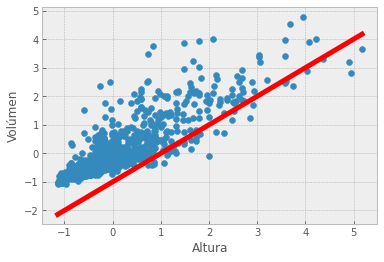

In [7]:
beta_0 = np.array([-1,1])
def myLR(beta, xc):
    return np.dot(beta, xc.T)

# scatter plot
plt.scatter(z_x, z_y)

# Plot the linear regression
xc = np.c_[np.ones(2), [z_x.min(), z_x.max()]]
plt.plot(xc[:, 1], myLR(beta_0, xc), 'r', lw=5)
plt.xlabel('Altura')
plt.ylabel('Volúmen')
plt.show()

Calculando el error de regresión:

In [8]:
# Cost function
def costFun(beta, x, y):
    res = 0
    for ii in range(x.shape[0]):
        res += 1 / (2*x.shape[0])*(myLR(beta,x[ii, :]) - y[ii]) ** 2
    return res
costFun(beta_0, xc, z_y)

5.577660467051906

Iterando los valores de $\beta$ para entender la función de costo.

Text(0, 0.5, 'J(beta)')

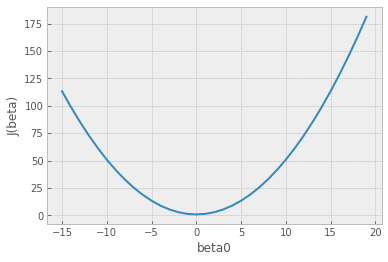

In [9]:
beta0 = np.arange(-15, 20, 1)
beta1 = 2

cost1=[]
for b_0 in beta0:
    cost1.append(costFun(np.array([b_0, beta1]), X_, z_y) )

plt.plot(beta0, cost1)
plt.xlabel('beta0')
plt.ylabel('J(beta)')

Text(0, 0.5, 'J(beta)')

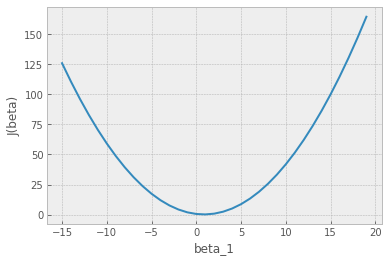

In [10]:
beta0 = 0
beta1 = np.arange(-15, 20, 1)

cost2=[]
for beta_1 in beta1:
    cost2.append(costFun(np.array([beta0, beta_1]), X_, z_y) )

plt.plot(beta1, cost2)
plt.xlabel('beta_1')
plt.ylabel('J(beta)')

Analizando ambos betas al mismo tiempo:

In [11]:
beta0 = np.arange(-5, 7, 0.5)
beta1 = np.arange(-5, 7, 0.5)

cost = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0:
    for beta_1 in beta1:
        cost.loc[beta_0, beta_1] = costFun(np.array([beta_0, beta_1]), X_, z_y)

betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])

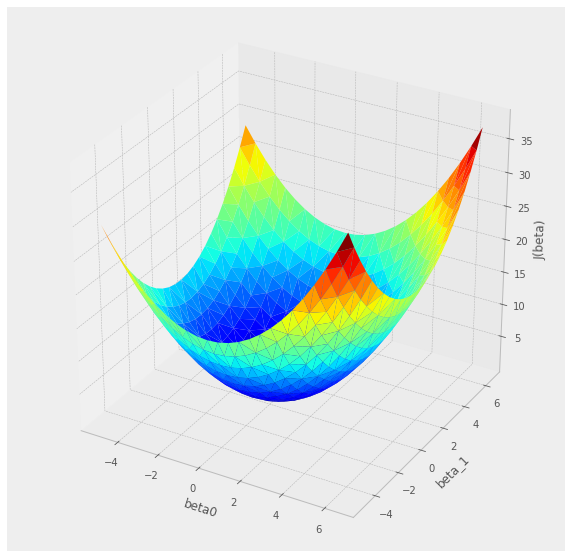

In [12]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], cost.T.values.flatten().astype('float'), cmap=cm.jet, linewidth=0.1)
ax.set_xlabel('beta0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

Este puede verse como un diagrama de curvas de nivel:

Text(0, 0.5, 'beta_1')

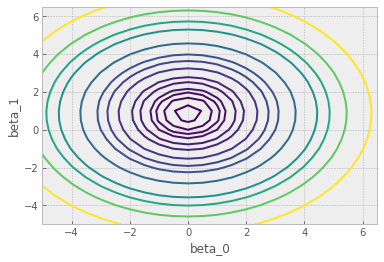

In [13]:
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]
plt.contour(beta0, beta1, cost.T.values, contour_levels)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

Observemos como se disponen diferentes betas en el mapa de contorno de los betas.



Regresión con betas:  [0 0]


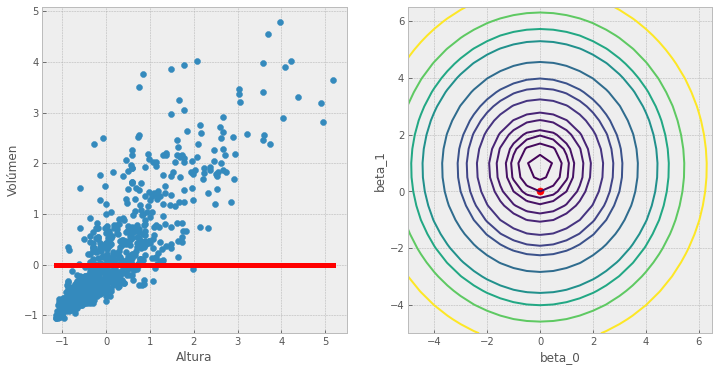



Regresión con betas:  [-1 -1]


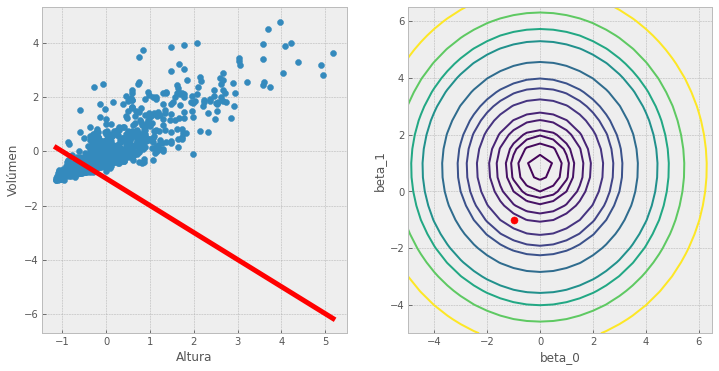



Regresión con betas:  [-5  5]


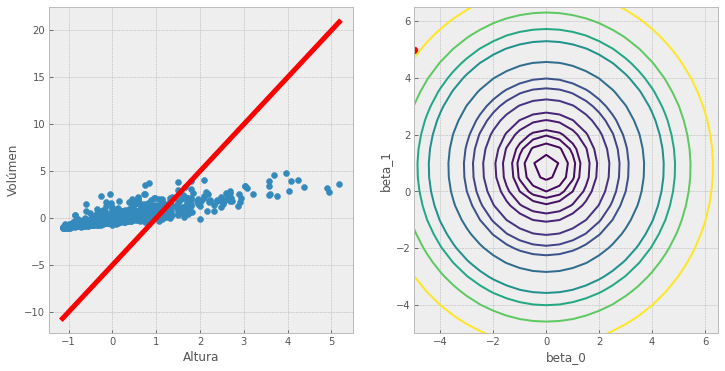



Regresión con betas:  [ 3 -2]


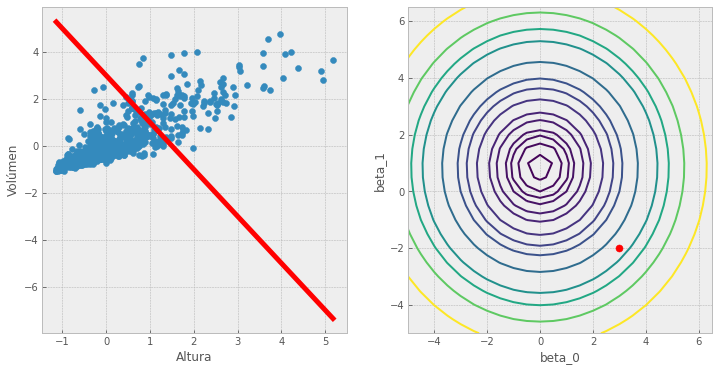

In [14]:
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])
for beta in betas:
    print('\n\nRegresión con betas: ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], s=50, c = 'red')
    # scatter plot
    ax1.scatter(z_x, z_y)

    # Plot the linear regression
    xc = np.c_[np.ones(2), [z_x.min(), z_x.max()]]
    ax1.plot(xc[:, 1], myLR(beta, xc), 'r', lw=5)
    ax1.set_xlabel('Altura')
    ax1.set_ylabel('Volúmen')
    plt.show()

# Algoritmo de gradiente descendente

Teniendo una función $(J(\beta_{0}, \beta_{1}))$ se busca minimizar $J(\beta_{0}, \beta_{1})$ respecto de $\beta_{0}, \beta_{1}$

* Proceso:
    ** Se inicia con valores aleatorios de $\beta_{0}, \beta_{1}$
    ** Iterar hasta encontrar el valor mínimo de $J(\beta_{0}, \beta_{1})$
    
Repetir hasta convergencia:

\begin{equation}
\beta_{j} = \beta_{j} - \alpha \frac{\partial}{\partial\beta_{j}}J(\beta_{0}, \beta_{1})
\end{equation}

Con lo cual simultaneamente se actualizan los valores de $\beta_{0}$ y $\beta_{1}$. $\alpha$ eneste caso corresponde a la tasa de entrenamiento.

En el caso particular de la regresión líneal con $\beta_{0}$ y $\beta_{1}$, la gradiente se calcula de la siguiente manera:

\begin{equation}
\frac{\partial}{\partial\beta_{j}}J(\beta_{0}, \beta_{1}) = \frac{\partial}{\partial\beta_{j}}\frac{1}{2n}\sum_{i = 1}^{n}(h_{\beta}(x_{i}) - y_{i})^{2}
\end{equation}

\begin{equation}
\frac{\partial}{\partial\beta_{j}}J(\beta_{0}, \beta_{1}) = \frac{\partial}{\partial\beta_{j}}\frac{1}{2n}\sum_{i = 1}^{n}(\beta_{0}+\beta_{1}x_{i} - y_{i})^{2}
\end{equation}

Para $\beta_{0}$:

\begin{equation}
j = 0: \frac{\partial}{\partial\beta_{0}} = \frac{1}{n}\sum_{i = 1}^{n}(\beta_{0}+\beta_{1}x_{i} - y_{i})
\end{equation}

Para $\beta_{1}$:
\begin{equation}
j = 1: \frac{\partial}{\partial\beta_{1}} = \frac{1}{n}\sum_{i = 1}^{n}(\beta_{0}+\beta_{1}x_{i} - y_{i}) x_{i}
\end{equation}

Entonces el algoritmo de **gradiente descendente** se obtiene repitiendo hasta la convergencia en *k* pasos **simultáneos**:

\begin{equation}
\beta_{0}^{k+1} := \beta_{0}^{k-1} - \alpha \frac{1}{n}\sum_{i = 1}^{n}(\beta_{0}^{k}+\beta_{1}^{k}x_{i} - y_{i})
\end{equation}

\begin{equation}
\beta_{1}^{k+1} := \beta_{1}^{k-1} - \alpha \frac{1}{n}\sum_{i = 1}^{n}(\beta_{0}^{k}+\beta_{1}^{k}x_{i} - y_{i}) x_{i}
\end{equation}

# Calcular la gradiente

In [15]:
betaInit = np.array([-1.5, 2.])

def gradiente(beta, x, y):
    Gbeta_0  = 1/x.shape[0]*((myLR(beta, x)-y).sum())
    Gbeta_1  = 1/x.shape[0]*((myLR(beta, x)-y)*x[:, 1]).sum()
    return np.array([Gbeta_0, Gbeta_1])

gradiente(betaInit, X_, z_y)


array([-1.5       ,  1.13701872])

# Algoritmo de gradiente descendente

In [16]:
def gradienteDesc(x, y, betaInit, rate, itera): 
    betas = np.zeros((itera, betaInit.shape[0] + 1))
    beta = betaInit
    for ii in range(itera):
        betas[ii, :-1] = beta
        betas[ii, -1] = costFun(beta, x, y)
        beta -= rate * gradiente(beta, x, y)
    return betas

itera = 100
rate = 0.05
betaInit = np.array([-4., -4.])

betas =  gradienteDesc(X_, z_y, betaInit, rate, itera)

Cómo se observa la función de costo?

Text(0, 0.5, 'J(beta)')

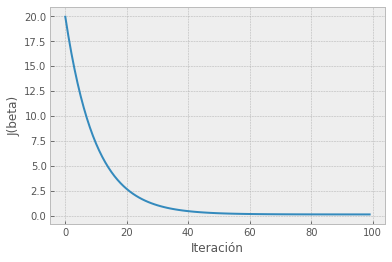

In [17]:
plt.plot(range(itera), betas[:, -1])
plt.xlabel('Iteración')
plt.ylabel('J(beta)')

Pero, realmente qué es lo que se hace en cada iteración?



Regresión con betas:  [-4. -4.]


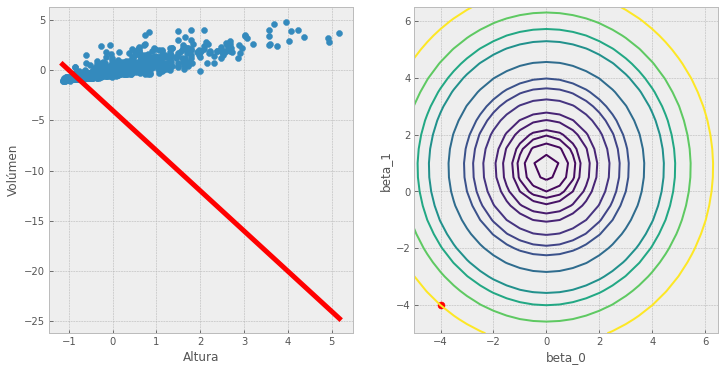



Regresión con betas:  [-2.39494776 -2.04866525]


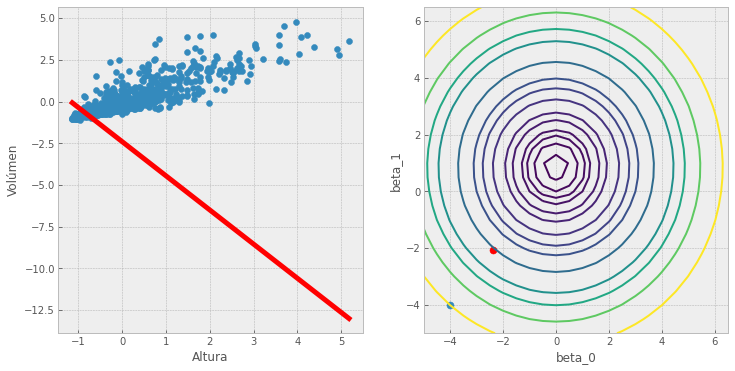



Regresión con betas:  [-1.43394369 -0.88032905]


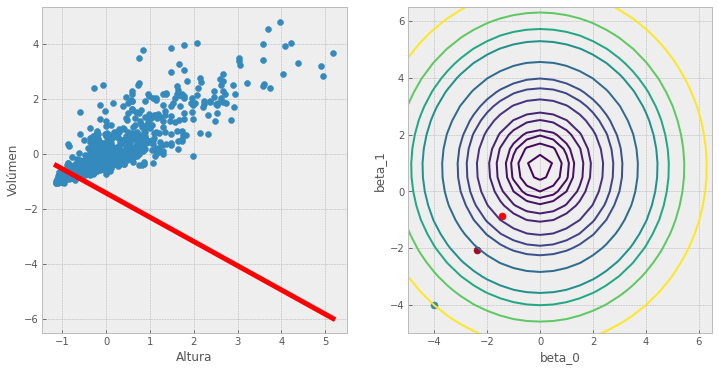



Regresión con betas:  [-0.85855506 -0.18080301]


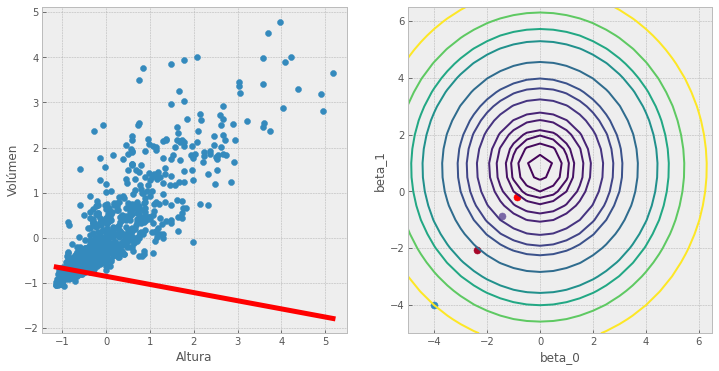



Regresión con betas:  [-0.51404863  0.23802907]


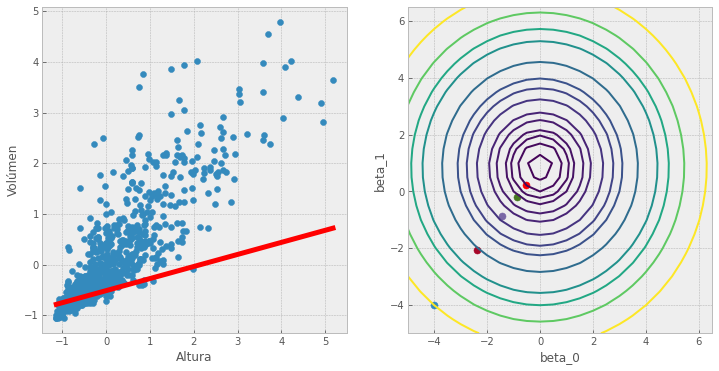



Regresión con betas:  [-0.3077799   0.48879931]


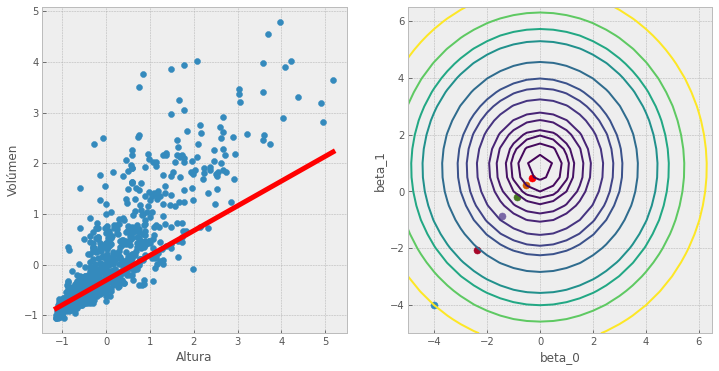



Regresión con betas:  [-0.1842792   0.63894471]


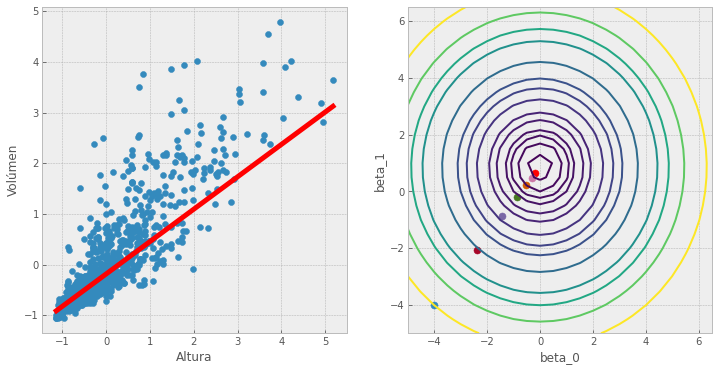



Regresión con betas:  [-0.11033476  0.72884231]


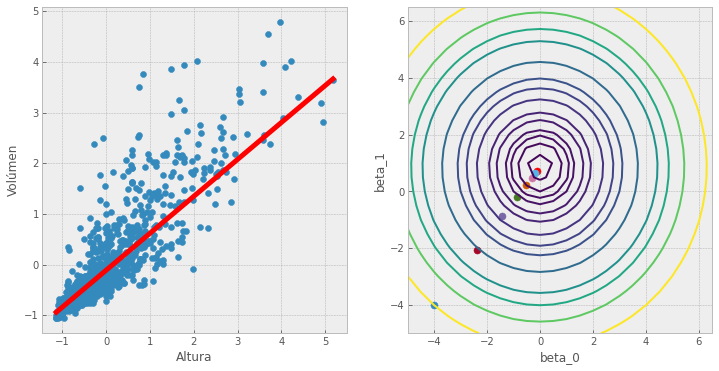



Regresión con betas:  [-0.0660615   0.78266733]


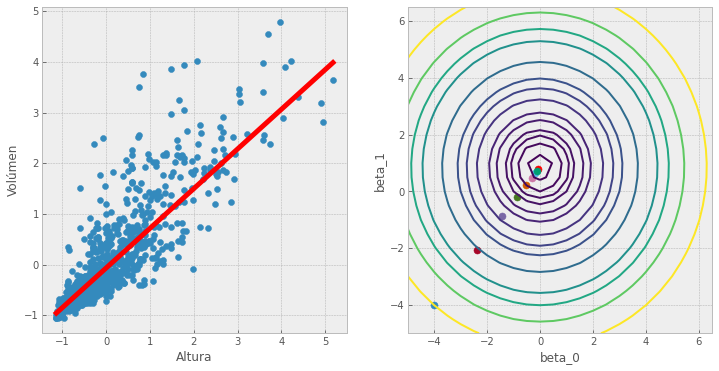



Regresión con betas:  [-0.03955346  0.81489435]


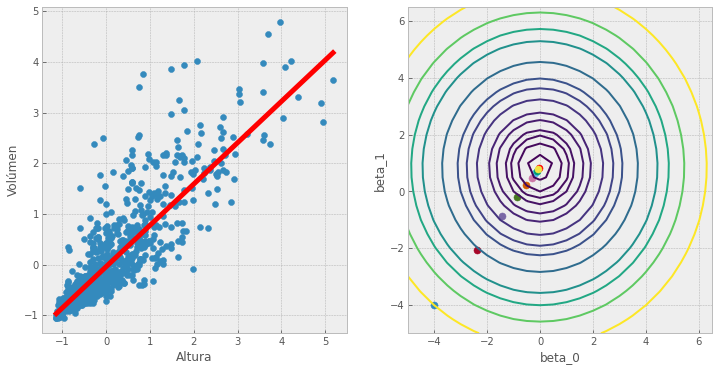

In [18]:
betas_ = betas[range(0, itera, 10), :-1] ## subset de los resultados

for ii, beta in enumerate(betas_):
    print('\n\nRegresión con betas: ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    if ii > 0:
        for beta_ in betas_[:ii]:
            ax2.scatter(beta_[0], beta_[1], s=50)

    # scatter plot
    ax1.scatter(z_x, z_y)
    
    # Plot the linear regression
    xc = np.c_[np.ones(2), [z_x.min(), z_x.max()]]
    ax1.plot(xc[:, 1], myLR(beta, xc), 'r', lw=5)
    ax1.set_xlabel('Altura')
    ax1.set_ylabel('Volúmen')
    plt.show()

In [19]:
# Betas Estimados
betas[-1, :-1]

array([-0.02492854,  0.83267452])

Betas_Est: b1_hat = 0.86 b0_hat = 0.00, std error= 0.016


/home/rho/rho_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.polyval is deprecated and will be removed in SciPy 2.0.0, use numpy.polyval instead
  after removing the cwd from sys.path.


Text(0, 0.5, 'Volúmen')

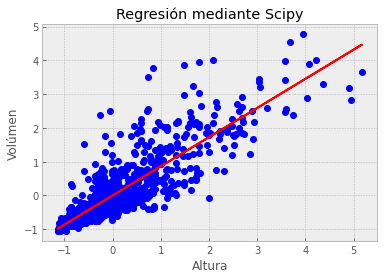

In [20]:
# Regresión
(b1, b0, r, tt, stderr) = stats.linregress(z_x, z_y)
print('Betas_Est: b1_hat = %.2f b0_hat = %.2f, std error= %.3f' % (b1,b0,stderr))
lineReg = polyval([b1, b0], z_x)
# matplotlib ploting
plt.title('Regresión mediante Scipy')
plt.plot(z_x, z_y, 'bo')
plt.plot(z_x, lineReg, 'r')
plt.xlabel('Altura')
plt.ylabel('Volúmen')

# Descomposición de sesgo y varianza

Analizando las propiedades del error de la predicción de regresión lineal (de hecho, este anślisis se puede extrapolar a todos los algoritmos de aprendizaje automático). Vamos a tener en cuenta lo siguiente: 

+ El valor estimado de la variable respuesta (**y**) corresponde a la suma de una función $f(x)$ (a cual surge de una hipótesis) y el error aleatorio $y = f\left(\textbf{x}\right) + \epsilon$.
+ El error se distribuye $\epsilon \sim N(0,\sigma^2)$
+ La variable **y** se distribuye $\epsilon \sim N(f(x),\sigma^2)$
+ Se intenta aproximar una función determinista pero desconocida $f(x)$ usando una función lineal de las covariables $\hat{f}(x)$, que, a su vez, es una estimación puntual de la función $f$ en un espacio funcional (específicamente, la familia de funciones lineales a las que se ha limitado el espacio), es decir, una variable aleatoria que tiene media y varianza determinada.


Entonces, el error en el punto **x** se descompone de la siguiente manera:

\begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\left(\widehat{f}\left(\textbf{x}\right)\right)^2\right] - 2\mathbb{E}\left[y\widehat{f}\left(\textbf{x}\right)\right] \\
&=& \mathbb{E}\left[y^2\right] + \mathbb{E}\left[\widehat{f}^2\right] - 2\mathbb{E}\left[y\widehat{f}\right] \\
\end{array}

Para mayor claridad, se consida a cada miembro por separado. Los dos primeros se descomponen fácilmente según la fórmula: $$\text{Var}\left(z\right) = \mathbb{E}\left[z^2\right] - \mathbb{E}\left[z\right]^2$$
\
\begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}
\
\begin{array}{rcl} 
\mathbb{E}\left[y^2\right] &=& \text{Var}\left(y\right) + \mathbb{E}\left[y\right]^2 = \sigma^2 + f^2\\
\mathbb{E}\left[\widehat{f}^2\right] &=& \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 \\
\end{array}
\
Note que:
\begin{array}{rcl} 
\text{Var}\left(y\right) &=& \mathbb{E}\left[\left(y - \mathbb{E}\left[y\right]\right)^2\right] \\
&=& \mathbb{E}\left[\left(y - f\right)^2\right] \\
&=& \mathbb{E}\left[\left(f + \epsilon - f\right)^2\right] \\
&=& \mathbb{E}\left[\epsilon^2\right] = \sigma^2
\end{array}
\
$$\mathbb{E}[y] = \mathbb{E}[f + \epsilon] = \mathbb{E}[f] + \mathbb{E}[\epsilon] = f$$
\
Y finalmente, se llega al último término de la suma. En este caso es necesario recordar que el error y la variable respuesta son independientes entre sí:
\
\begin{array}{rcl} 
\mathbb{E}\left[y\widehat{f}\right] &=& \mathbb{E}\left[\left(f + \epsilon\right)\widehat{f}\right] \\
&=& \mathbb{E}\left[f\widehat{f}\right] + \mathbb{E}\left[\epsilon\widehat{f}\right] \\
&=& f\mathbb{E}\left[\widehat{f}\right] + \mathbb{E}\left[\epsilon\right] \mathbb{E}\left[\widehat{f}\right]  = f\mathbb{E}\left[\widehat{f}\right]
\end{array}
\
Juntando todo:
\
\begin{array}{rcl} 
\text{Err}\left(\textbf{x}\right) &=& \mathbb{E}\left[\left(y - \widehat{f}\left(\textbf{x}\right)\right)^2\right] \\
&=& \sigma^2 + f^2 + \text{Var}\left(\widehat{f}\right) + \mathbb{E}\left[\widehat{f}\right]^2 - 2f\mathbb{E}\left[\widehat{f}\right] \\
&=& \left(f - \mathbb{E}\left[\widehat{f}\right]\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2 \\
&=& \text{Bias}\left(\widehat{f}\right)^2 + \text{Var}\left(\widehat{f}\right) + \sigma^2
\end{array}
\
La última fórmula dice que el error de pronóstico de cualquier modelo de tipo $y = f (x) + \epsilon$ se compone de:
+ $\text{Bias}^2$: Corresponde al promedio del error de los conjuntos de datos.
+ $\text{Var}(\hat{f})$: Representa a la variabilidad del error, nos dice cuánto variará el error sise entrena el modelo con diferentes conjuntos de datos.
+ $\sigma^2$: Error Irreducible.
\
Aunque no se pueda hacer nada con $\sigma^2$, se puede influir en los dos primeros. Aunque se piense que lo ideal sería que tanto $\text{Bias}^2$ como $\text{Var}(\hat{f})$ fueran nulas, en la práctica, es necesario equilibrar las estimaciones sesgadas e inestables (de alta varianza).

<img src="https://www.machinecurve.com/wp-content/uploads/2020/11/darts.png" width="500" height="500">

Generalmente, a medida que el modelo aumenta se vuelve más flexible (por ejemplo, cuando aumenta el número de parámetros libres o la familia de funciones de los predictores), la varianza de la estimación también aumenta, pero el sesgo disminuye. Debido al hecho de que el conjunto de entrenamiento memoriza completamente en lugar de generalizar,  generando sobreajuste. Por otro lado, si el modelo es demasiado débil, no podrá aprender el patrón, lo que resultará en aprender algo distante, respecto de la solución correcta.

<img src="https://i.stack.imgur.com/GEJIM.png" width="500" height="500">

El teorema de Gauss-Markov afirma que el estimador **MCO** del modelo lineal es el mejor estimador lineal insesgado. Esto significa que si existe cualquier otro modelo insesgado *g*, de la misma clase de modelos lineales, se puede estar seguro que $Var\left(\widehat{f}\right) \leq Var\left(g\right)$, lo cual se puede lograr a través de la regularización de los modelos, es decir:

\begin{array}{rcl} 
\mathcal{L}\left(\textbf{X}, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \left\| \textbf{y} - \textbf{X} \textbf{w} \right\|_2^2 + \left\| \Gamma \textbf{w}\right\|^2\\
\end{array}

Llegando a:
\begin{array}{rcl} 
\textbf{B} &=& \left(\textbf{X}^{\text{T}} \textbf{X} + \lambda \textbf{E}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}





## Ejemplo sencillo para entender el sesgo y la varianza

1. Simule unos datos a partir de una distribución de datos  $f^{∗}$
2. Ajuste un modelo de regresión lineal
3. Ajuste un algoritmo de suavización local:

$$\hat{f}(x_0) = \frac{1}{\#(x_0,h)}\sum_{i \ \in \ [x_0-h, x_0+h]}y_i$$

donde  $\#(x_0,h)$  corresponde al número de puntos en el intervalo  $[x_0−h,x_0+h]$

+ Compare y concluya
+ Cómo se controla la flexibilidad del modelo?

1. Simule unos datos a partir de una distribución de datos  $f^{∗}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
## definir la función
def f(x):
    z = 2 + x**.5*np.cos(18*x)/x**(1/2)
    return(z)

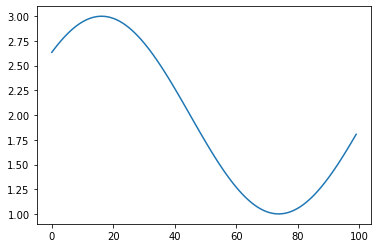

In [11]:
a = np.linspace(0.3, 0.6, 100)
plt.plot(f(a))

In [12]:
n = 100
sigma = .2

np.random.seed(123456)
x = np.random.uniform(0.3, 0.6, n)
x = np.sort(x)

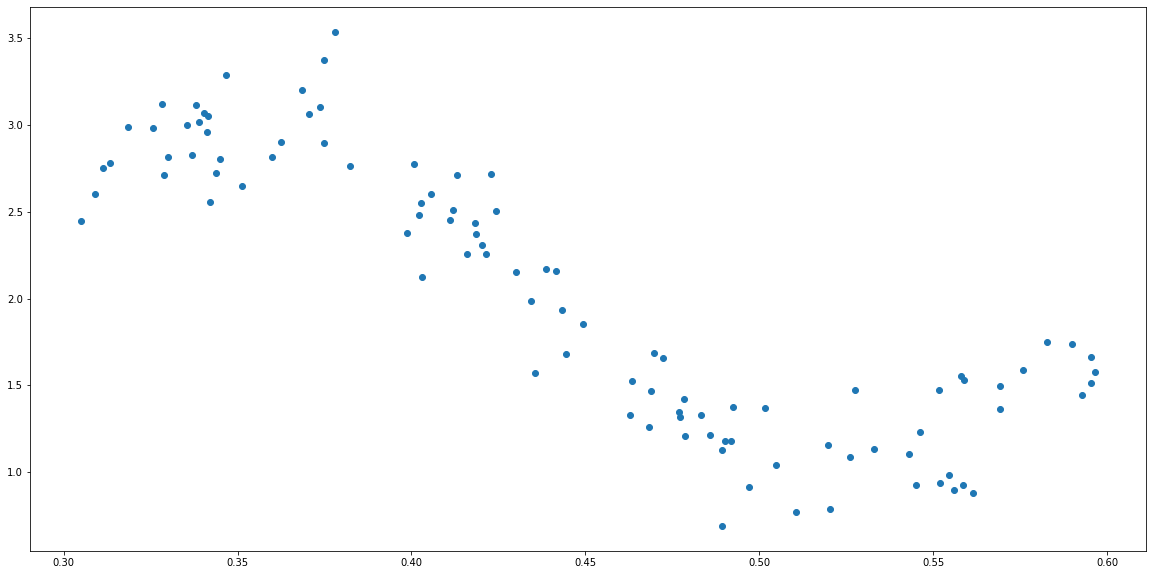

In [13]:
y = f(x) + np.random.normal(0, sigma, len(x))
plt.figure(figsize=(20,10))
plt.scatter(x, y)

2. Ajuste un modelo de regresión lineal

In [20]:
# inicializar elmodelo de regresión
lm = LinearRegression()
y_m = y.reshape(-1, 1)
x_m = x.reshape(-1,1)
mod1 = lm.fit(x_m, y_m)

In [21]:
print('Betas_Est: b0_hat = %.2f b1_hat = %.2f' % (mod1.intercept_,mod1.coef_))

Betas_Est: b0_hat = 5.49 b1_hat = -7.79


In [22]:
# Cost function
def ecm(mod, x, y, n):
    y_hat = mod.predict(x)
    error = np.sqrt(np.sum((y - y_hat)**2)/n)
    return error

In [23]:
rmse1 = ecm(mod1, x_m, y_m, len(y_m))
print(rmse1)
print(np.std(mod1.predict(x_m)))

0.4059364263796866
0.6581897615926064


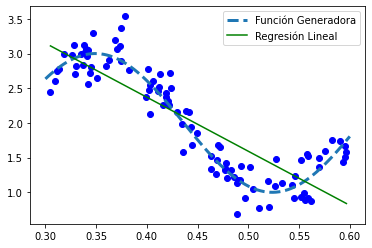

In [24]:
x_val = np.linspace(0.3, 0.6, n)
y_val = f(x_val)

plt.plot(x, y, 'bo')
plt.plot(x_val, y_val, '--', linewidth = 3, label = "Función Generadora")
plt.plot(x, mod1.predict(x_m), color = 'green', label = "Regresión Lineal")
plt.legend()

3. Ajuste un algoritmo de suavización local:

$$\hat{f}(x_0) = \frac{1}{\#(x_0,h)}\sum_{i \ \in \ [x_0-h, x_0+h]}y_i$$

donde  $\#(x_0,h)$  corresponde al número de puntos en el intervalo  $[x_0−h,x_0+h]$

In [25]:
h = 5
y_new = np.array([])


for ii in range(n):
    if ii - h <= 0:
        y_ast = 1/y[(ii):(ii+h)].shape[0]*sum(y[(ii):(ii+h)])
    elif ii + h >= n:
        y_ast = 1/y[(ii-h):(ii)].shape[0]*sum(y[(ii-h):(ii)])
    else:
        y_ast = 1/y[(ii-h):(ii+h)].shape[0]*sum(y[(ii-h):(ii+h)])
    y_new = np.append(y_new, y_ast)

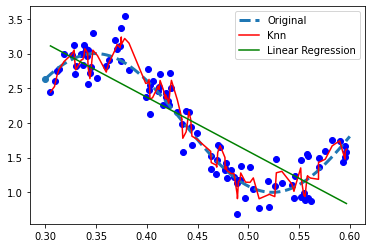

Error Cuadratico Medio para Regresion Lineal:  0.4059364263796866
Error Cuadratico Medio para 5 Vecinos:  0.1594184623583268


In [26]:
### KNN
h = 1  ## cambiar a gusto
y_new = np.array([])

for ii in range(n):
    if ii-h < 0:
        y_ast = 1/y[ii:(ii+h)].shape[0]*sum(y[ii:(ii+h)])
    elif ii+h > n:
        y_ast = 1/y[(ii-h):ii].shape[0]*sum(y[(ii-h):ii])
    else:
        y_ast = 1/y[(ii-h):(ii+h)].shape[0]*sum(y[(ii-h):(ii+h)])
    y_new = np.append(y_new, y_ast)
#y_new = y_new.reshape(-1, 1)

rr = np.arange(0.3, 0.6)

# 
plt.plot(x,y, 'bo')
plt.scatter(rr, f(rr))
plt.plot(x_val, y_val, '--', linewidth=3.0, label = 'Original')
plt.plot(x_m, y_new, 'r', label = 'Knn')
plt.plot(x_m, mod1.predict(x_m), 'r', color = "green", label = "Linear Regression")
plt.legend()
plt.show()

rmse2 = np.sqrt(sum((y_new - y)**2)/n)
print("Error Cuadratico Medio para Regresion Lineal: ", rmse1)
print("Error Cuadratico Medio para 5 Vecinos: ", rmse2)

In [40]:
#### CALIBRANDO EL VALOR DE h

rango = np.linspace(0.3,0.6,100)

z = np.array([])
for ii in rango:
    z = np.append(z, f(ii))

rmseIter = []
varIter = []
biasIter = []
for h in range(1,41):
    y_new2 = []
    for ii in range(n):
        if ii-h <= 0:
            y_ast = 1/y[ii:(ii+h)].shape[0]*sum(y[ii:(ii+h)])
        elif ii+h >= n:
            y_ast = 1/y[(ii-h):(ii)].shape[0]*sum(y[(ii-h):(ii)])
        else:
            y_ast = 1/y[(ii-h):(ii+h)].shape[0]*sum(y[(ii-h):(ii+h)])
        y_new2 = np.append(y_new2, y_ast)
    rmseIter = np.append(rmseIter, np.sqrt(sum((y_new2 - z)**2)/n))
    varIter.append(np.std(y_new2))
    biasIter.append(np.sum((y_new2-z)**2)/n)

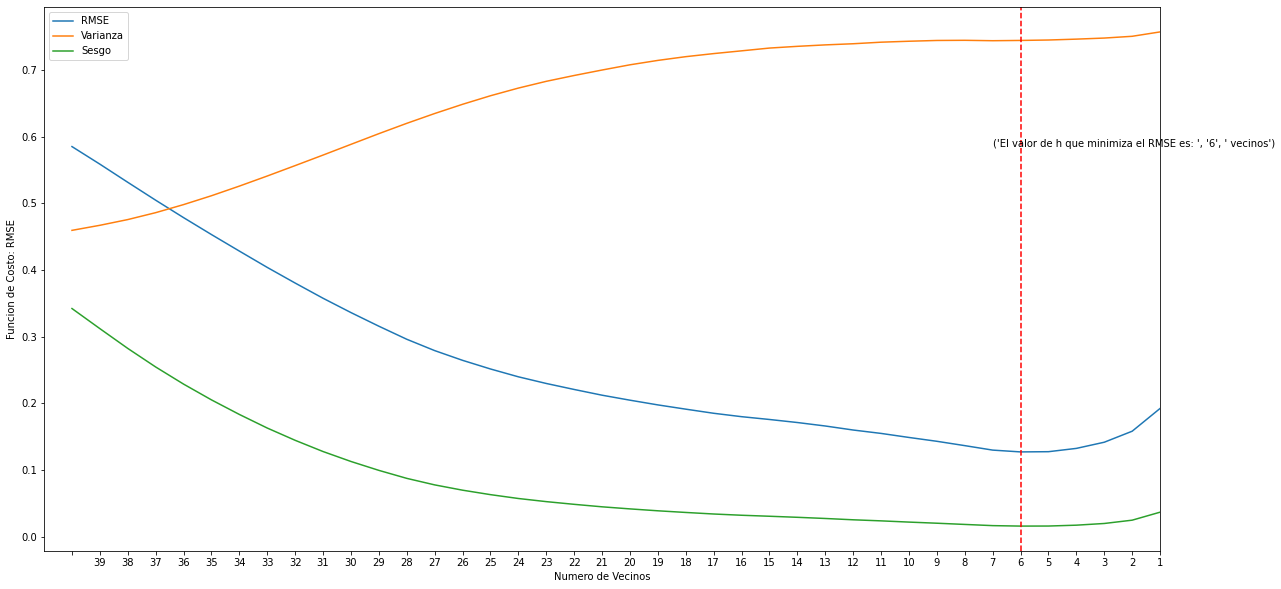

In [46]:
plt.rcParams["figure.figsize"] = (20,10)
s = "El valor de h que minimiza el RMSE es: ", str(rmseIter.argmin()+1), " vecinos"
labels = np.arange(1,40,1)
plt.xlim(40,0)
plt.xticks(np.arange(0,40,1), labels)
plt.plot(rmseIter, label = "RMSE")
plt.plot(varIter, label = "Varianza")
plt.plot(biasIter,label = "Sesgo")
plt.xlabel('Numero de Vecinos')
plt.ylabel('Funcion de Costo: RMSE')
plt.axvline(x = rmseIter.argmin(), color='r', linestyle='--')
plt.text(x = (rmseIter.argmin()+1), y = rmseIter.max(), s = s)
plt.legend()

In [76]:
### MODELO CALIBRADO
h = rmseIter.argmin()+1
y_new3 = np.array([])
for ii in range(n):
    if ii-h <= 0:
        y_ast = 1/y[ii:(ii+h)].shape[0]*sum(y[ii:(ii+h)])
    elif ii+h >= n:
        y_ast = 1/y[(ii-h):ii].shape[0]*sum(y[(ii-h):ii])
    else:
        y_ast = 1/y[(ii-h):(ii+h)].shape[0]*sum(y[(ii-h):(ii+h)])
    y_new3 = np.append(y_new3, y_ast)

rmse3 = np.sqrt(sum((y_new3 - y)**2)/n)
print("Error Cuadratico Medio para Regresion Lineal: ", rmse1)
print("Error Cuadratico Medio para 1 Vecinos: ", rmse2)
print("Error Cuadratico Medio para el número óptimo de Vecinos: ", rmse3)

Error Cuadratico Medio para Regresion Lineal:  0.40094454587327005
Error Cuadratico Medio para 1 Vecinos:  0.15541939516868172
Error Cuadratico Medio para el número óptimo de Vecinos:  0.2132416321337479


In [77]:
### correr lowess
import statsmodels.api as sm
lowess = sm.nonparametric.lowess(y, x, frac = .3)
### pasar a dataframe
low_dat = pd.DataFrame(lowess, columns = ['x', 'y_hat_lowess'])

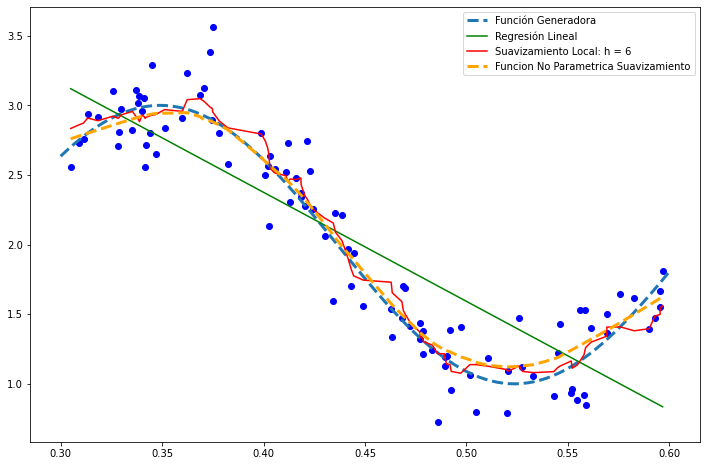

In [78]:
plt.figure(figsize=(12,8))
plt.plot(x, y, 'bo')
plt.plot(x_val, y_val, '--', linewidth = 3, label = "Función Generadora")
plt.plot(x, mod1.predict(x_m), color = 'green', label = "Regresión Lineal")
plt.plot(x, y_new3, color = 'red', label = 'Suavizamiento Local: h = 6')
plt.plot(x, low_dat.y_hat_lowess, '--', linewidth = 3, color = "orange", label = "Funcion No Parametrica Suavizamiento")
plt.legend()